In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import ast

In [2]:
# import landmark coordinates
landmarks = pd.read_csv('~/Notebooks/TestProject/sky_fa_final.csv', index_col = 'image_name')

In [3]:
# Indices of X & Y-coordinates
x_coordinates = ['point1_x', 'point2_x', 'point3_x', 'point4_x', 'point5_x', 'point6_x', 'point7_x', 'point8_x', 'point9_x', 'point10_x', 'point11_x', 'point12_x', 'point13_x', 'point14_x', 'point15_x', 'point16_x', 'point17_x', 'point18_x', 'point19_x', 'point20_x', 'point21_x', 'point22_x', 'point23_x', 'point24_x', 'point25_x', 'point26_x', 'point27_x', 'point28_x', 'point29_x', 'point30_x', 'point31_x', 'point32_x', 'point33_x', 'point34_x', 'point35_x', 'point36_x', 'point37_x', 'point38_x', 'point39_x', 'point40_x', 'point41_x', 'point42_x', 'point43_x', 'point44_x', 'point45_x', 'point46_x', 'point47_x', 'point48_x', 'point49_x', 'point50_x', 'point51_x', 'point52_x', 'point53_x', 'point54_x', 'point55_x', 'point56_x', 'point57_x', 'point58_x', 'point59_x', 'point60_x', 'point61_x', 'point62_x', 'point63_x', 'point64_x', 'point65_x', 'point66_x', 'point67_x', 'point68_x']
y_coordinates = ['point1_y', 'point2_y', 'point3_y', 'point4_y', 'point5_y', 'point6_y', 'point7_y', 'point8_y', 'point9_y', 'point10_y', 'point11_y', 'point12_y', 'point13_y', 'point14_y', 'point15_y', 'point16_y', 'point17_y', 'point18_y', 'point19_y', 'point20_y', 'point21_y', 'point22_y', 'point23_y', 'point24_y', 'point25_y', 'point26_y', 'point27_y', 'point28_y', 'point29_y', 'point30_y', 'point31_y', 'point32_y', 'point33_y', 'point34_y', 'point35_y', 'point36_y', 'point37_y', 'point38_x', 'point39_y', 'point40_y', 'point41_y', 'point42_y', 'point43_y', 'point44_y', 'point45_y', 'point46_y', 'point47_y', 'point48_y', 'point49_y', 'point50_y', 'point51_y', 'point52_y', 'point53_y', 'point54_y', 'point55_y', 'point56_y', 'point57_y', 'point58_y', 'point59_y', 'point60_y', 'point61_y', 'point62_y', 'point63_y', 'point64_y', 'point65_y', 'point66_y', 'point67_y', 'point68_y']

In [4]:
# Separating X & Y coordinates to estimate coordinates for shifed origin/centroid/mean
new_df_x = landmarks[x_coordinates]
new_df_x['x_mean'] = new_df_x.mean(numeric_only=True, axis=1)
new_df_y = landmarks[y_coordinates]
new_df_y['y_mean'] = new_df_y.mean(numeric_only=True, axis=1)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
# Shifing all the coodinates to new frame, with mean as the origin
for cols in x_coordinates:
    new_df_x[cols] = new_df_x[cols] - new_df_x['x_mean']
for cols in y_coordinates:
    new_df_y[cols] = new_df_y[cols] - new_df_y['y_mean']

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# Creating a new DataFrame with both X and Y coordinates
new_df = pd.concat([new_df_x, new_df_y], axis = 1)

In [7]:
# Deleting mean columns
new_df = new_df.drop(['x_mean', 'y_mean'], axis= 1)

In [8]:
# Normalizing all coordinates to get a 136 dimensional unit vector
new_df = new_df.div(np.sqrt(np.square(new_df).sum(axis=1)), axis=0)

In [9]:
# Definition of required functions
def pdistl(x,y,x1,y1,x2,y2):
    m = (y2-y1)/(x2-x1)
    c = y2 - m*x2
    d = np.sqrt((m*x-y + c)**2/(1+m**2))
    return d
def angle(x1,y1,x2,y2,x3,y3,x4,y4):
    return (np.arctan((y2-y1)/(x2-x1))-np.arctan((y4-y3)/(x4-x3)))
def chin_angle(x1,y1,x2,y2,x3,y3):
    return (np.arctan((y3-y2)/(x3-x2))-np.arctan((y2-y1)/(x2-x1)))
def dist(x1,y1,x2,y2):
    return (np.sqrt((x2-x1)**2+(y2-y1)**2))
def slope(x1,y1,x2,y2):
    return np.arctan((y2-y1)/(x2-x1))

In [10]:
# Creating an interim DataFrame to get individual distances of, points(5,6,7,8) from line(4,9) & points(10,11,12,13) from line(14,9)
interm_df = pd.DataFrame(index=new_df.index)

interm_df['p5d49'] = pdistl(new_df['point5_x'], new_df['point5_y'], new_df['point4_x'], new_df['point4_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p6d49'] = pdistl(new_df['point6_x'], new_df['point6_y'], new_df['point4_x'], new_df['point4_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p7d49'] = pdistl(new_df['point7_x'], new_df['point7_y'], new_df['point4_x'], new_df['point4_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p8d49'] = pdistl(new_df['point8_x'], new_df['point8_y'], new_df['point4_x'], new_df['point4_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p13d149'] = pdistl(new_df['point13_x'], new_df['point13_y'], new_df['point14_x'], new_df['point14_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p12d149'] = pdistl(new_df['point12_x'], new_df['point12_y'], new_df['point14_x'], new_df['point14_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p11d149'] = pdistl(new_df['point11_x'], new_df['point11_y'], new_df['point14_x'], new_df['point14_y'], new_df['point9_x'], new_df['point9_y'])
interm_df['p10d149'] = pdistl(new_df['point10_x'], new_df['point10_y'], new_df['point14_x'], new_df['point14_y'], new_df['point9_x'], new_df['point9_y'])

In [11]:
# Creating the parameters DataFrame(these are final features which will be used for ML)
params_df = pd.DataFrame(index=new_df.index)

params_df['v_angle'] = slope(new_df['point9_x'], new_df['point9_y'], new_df['point17_x'], new_df['point17_y']) - slope(new_df['point9_x'], new_df['point9_y'], new_df['point1_x'], new_df['point1_y'])
params_df['chin_ratio'] = dist(new_df['point2_x'], new_df['point2_y'], new_df['point16_x'], new_df['point16_y'])/dist(new_df['point1_x'], new_df['point1_y'], new_df['point17_x'], new_df['point17_y']) 
params_df['jaw_ratio'] = dist(new_df['point5_x'], new_df['point5_y'], new_df['point13_x'], new_df['point13_y'])/dist(new_df['point1_x'], new_df['point1_y'], new_df['point17_x'], new_df['point17_y']) 
params_df['jaw_angle_right'] = (180/np.pi)*(np.pi-angle(new_df['point3_x'], new_df['point3_y'], new_df['point4_x'], new_df['point4_y'], new_df['point6_x'], new_df['point6_y'], new_df['point7_x'], new_df['point7_y']))
params_df['jaw_angle_left'] = (180/np.pi)*(np.pi + angle(new_df['point14_x'], new_df['point14_y'], new_df['point15_x'], new_df['point15_y'], new_df['point11_x'], new_df['point11_y'], new_df['point12_x'], new_df['point12_y']))
params_df['jaw_angle_avg'] = (params_df['jaw_angle_right'] + params_df['jaw_angle_left'])/2
params_df['chin_angle'] = (180/np.pi)*(np.pi+chin_angle(new_df['point7_x'], new_df['point7_y'], new_df['point9_x'], new_df['point9_y'], new_df['point11_x'], new_df['point11_y']))
params_df['jaw_curve_right'] = interm_df['p5d49'] + interm_df['p6d49'] + interm_df['p7d49'] + interm_df['p8d49']
params_df['jaw_curve_left'] = interm_df['p13d149'] + interm_df['p12d149'] + interm_df['p11d149'] + interm_df['p10d149']
params_df['jaw_curve_avg'] = (params_df['jaw_curve_right'] + params_df['jaw_curve_left'])/2

In [12]:
params_df

,v_angle,chin_ratio,jaw_ratio,jaw_angle_right,jaw_angle_left,jaw_angle_avg,chin_angle,jaw_curve_right,jaw_curve_left,jaw_curve_avg
image_name,,,,,,,,,,
00001_930831_fa_a.jpg,-1.555083,0.989602,0.832947,129.855801,136.079862,132.967831,155.772629,0.088524,0.095823,0.092174
00002_930831_fa.jpg,-1.543413,0.969811,0.829260,135.065863,124.445042,129.755452,157.471036,0.102257,0.101484,0.101871
00002_931230_fa.jpg,-1.614679,0.973845,0.831656,140.320835,135.281218,137.801026,154.842847,0.112302,0.117112,0.114707
00002_940128_fa.jpg,-1.606140,0.978791,0.823781,140.069210,131.218282,135.643746,152.838603,0.108978,0.103521,0.106249
00002_940422_fa.jpg,-1.589783,0.968800,0.816462,136.644471,131.447415,134.045943,155.626374,0.108367,0.106340,0.107353
00002_940928_fa.jpg,-1.628422,0.971566,0.815042,138.384360,131.868089,135.126225,155.643663,0.109452,0.103262,0.106357
00003_930831_fa_a.jpg,-1.644947,0.991654,0.829035,141.383520,140.847585,141.115553,152.352796,0.087774,0.101855,0.094815
00003_931230_fa_a.jpg,-1.701457,0.979990,0.831523,150.877502,138.996852,144.937177,152.820259,0.109675,0.106047,0.107861
00003_940307_fa_a.jpg,-1.693215,0.980451,0.807327,138.827397,136.433454,137.630425,150.954678,0.094941,0.097650,0.096295


In [13]:
parameters = ['v_angle', 'chin_ratio', 'jaw_ratio', 'jaw_angle_right', 'jaw_angle_left', 'chin_angle', 'jaw_curve_right', 'jaw_curve_left']

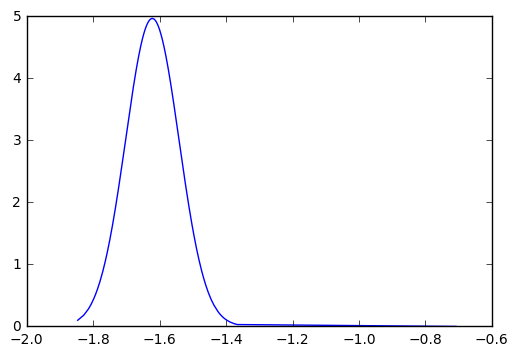

In [14]:
# draw distribution curve of v_angle
h = sorted(params_df.v_angle)
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf)
plt.show()

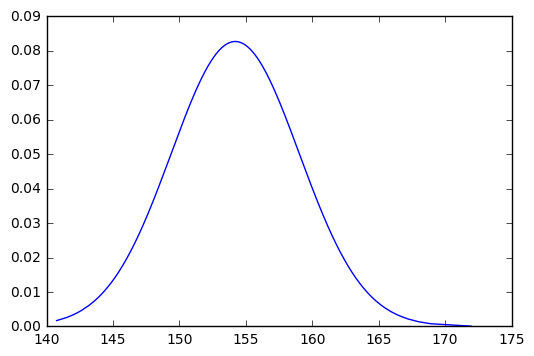

In [15]:
# draw distribution curve of chin_angle
g = sorted(params_df.chin_angle)
gmean = np.mean(g)
gstd = np.std(g)
gpdf = stats.norm.pdf(g, gmean, gstd)
plt.plot(g, gpdf)
plt.show()